# Dataframe

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
#read data from file
df= pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/Winter_medals2022-11-03.csv")

In [75]:
df.head()

,Country,Year,Gold,Silver,Bronze,Total,Country Code,Population
0,Australia,1994,0,0,1,1,AUS,17855000
1,Australia,1998,0,0,1,1,AUS,18711000
2,Australia,2002,2,0,0,2,AUS,19651400
3,Australia,2006,1,0,1,2,AUS,20697900
4,Australia,2010,2,1,0,3,AUS,22031750


In [77]:
# select relevant columns
cleaned_df=df[['Country', 'Gold', 'Silver', 'Bronze']]
cleaned_df.head()

,Country,Gold,Silver,Bronze
0,Australia,0,0,1
1,Australia,0,0,1
2,Australia,2,0,0
3,Australia,1,0,1
4,Australia,2,1,0


In [58]:
# Grouping. get the total number by group
grouped_df=cleaned_df.groupby("Country").sum()
grouped_df

,Gold,Silver,Bronze
Country,,,
Australia,6,9,7
Austria,51,58,67
Belarus,10,8,5
Belgium,1,2,2
Bulgaria,1,2,2
Canada,75,70,71
China,23,38,25
Croatia,4,6,1
Czech Republic,12,13,16


In [60]:
# Mutate - add a new column for total
grouped_df['Total']=grouped_df.sum(axis=1)
grouped_df.head()

,Gold,Silver,Bronze,Total
Country,,,,
Australia,6,9,7,22
Austria,51,58,67,176
Belarus,10,8,5,23
Belgium,1,2,2,5
Bulgaria,1,2,2,5


In [62]:
# Sorting
grouped_df.sort_values('Total', ascending=False).head()

,Gold,Silver,Bronze,Total
Country,,,,
Germany,123,117,75,315
Norway,108,93,83,284
United States,82,85,71,238
Canada,75,70,71,216
Russia,57,63,67,187


In [79]:
#Filtering
grouped_df.loc[ (grouped_df['Gold']>10) & (grouped_df['Silver']> 30)].sort_values('Total', ascending=False).head()

,Gold,Silver,Bronze,Total
Country,,,,
Germany,123,117,75,315
Norway,108,93,83,284
United States,82,85,71,238
Canada,75,70,71,216
Russia,57,63,67,187


# Visualization

In [83]:
import matplotlib.pyplot as plt

,Country,Year,Gold,Silver,Bronze,Total,Country Code,Population
231,Sweden,1988,4,0,2,6,SWE,8436489
232,Sweden,1992,1,0,3,4,SWE,8668067
233,Sweden,1994,2,1,0,3,SWE,8780745
234,Sweden,1998,0,2,1,3,SWE,8850974
235,Sweden,2002,0,2,5,7,SWE,8924958
236,Sweden,2006,7,2,5,14,SWE,9080505
237,Sweden,2010,5,2,4,11,SWE,9378126
238,Sweden,2014,2,7,6,15,SWE,9696110
239,Sweden,2018,7,6,1,14,SWE,10175214
240,Sweden,2018,7,6,1,14,SWE,10110118


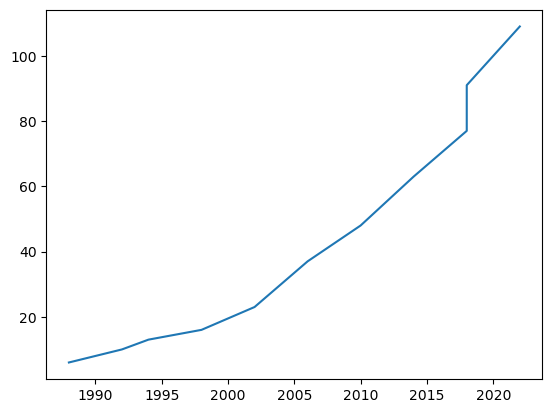

In [109]:
swe_medals = df.loc[df['Country']=='Sweden']

x = swe_medals['Year']
y = swe_medals['Total'].cumsum()

plt.plot(x, y)

swe_medals

<Axes: xlabel='Year'>

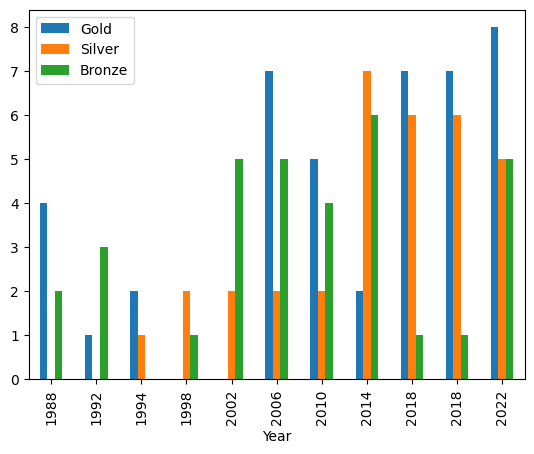

In [111]:
country = 'Sweden'

df\
    .loc[df['Country']==country]\
    [['Year', 'Gold', 'Silver', 'Bronze']]\
    .set_index('Year')\
    .plot.bar()

Text(0, 0.5, 'y')

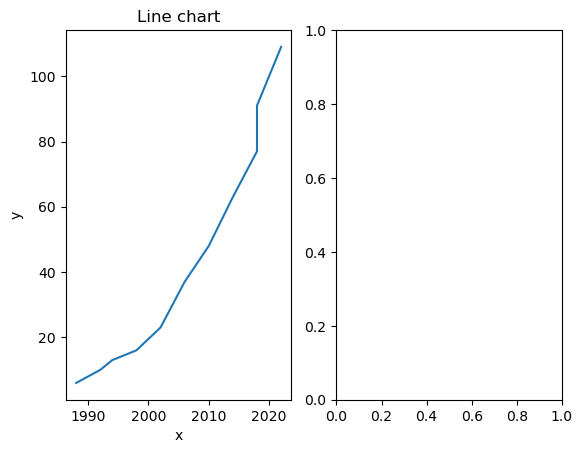

In [123]:
fig, ax = plt.subplots(1, 2)

ax[0].plot(x, y)
ax[0].set_title('Line chart')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')



In [12]:
plt.plot?

Signature:
plt.plot(
    *args: 'float | ArrayLike | str',
    scalex: 'bool' = True,
    scaley: 'bool' = True,
    data=None,
    **kwargs,
) -> 'list[Line2D]'
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yie